**MUSIC RECOMMENDATION SYSTEM**

**01: Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


**02: Load And Inspect Dataset**

In [2]:
df = pd.read_csv("/content/Spotify_data.csv")

In [3]:
print(df.head())

     Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No         

In [4]:
print(df.tail())

       Age  Gender spotify_usage_period  \
515  20-35  Female    More than 2 years   
516  20-35  Female    More than 2 years   
517  20-35  Female    More than 2 years   
518  20-35  Female   6 months to 1 year   
519  20-35  Female    More than 2 years   

                             spotify_listening_device  \
515  Smartphone, Computer or laptop, Wearable devices   
516                    Smartphone, Computer or laptop   
517                                        Smartphone   
518                                        Smartphone   
519                    Smartphone, Computer or laptop   

       spotify_subscription_plan premium_sub_willingness  \
515          Free (ad-supported)                     Yes   
516          Free (ad-supported)                     Yes   
517          Free (ad-supported)                      No   
518  Premium (paid subscription)                     Yes   
519  Premium (paid subscription)                     Yes   

             preffered_premium_plan p

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [6]:
print(df.describe())

       music_recc_rating
count         520.000000
mean            3.503846
std             0.979552
min             1.000000
25%             3.000000
50%             3.500000
75%             4.000000
max             5.000000


**Total Listening Frequency For Each Music Genre**

In [7]:
genre_stats = df.groupby('fav_music_genre')['music_lis_frequency'].sum().reset_index()

**Top Five Most Played Songs**

In [8]:
top_5_most_listened = genre_stats.sort_values('music_lis_frequency', ascending=False).head(5)
print("Top 5 Most Listened Genres:\n", top_5_most_listened)

Top 5 Most Listened Genres:
           fav_music_genre                                music_lis_frequency
4                  Melody  leisure timeOffice hours, Workout session, lei...
5               Old songs                                       leisure time
7                     Rap  Workout sessionOffice hours, While Traveling, ...
0                     All  Workout session, leisure timeOffice hours, Stu...
10  trending songs random                      While Traveling, leisure time


**Top Five Least Played Songs**

In [9]:
top_5_least_listened = genre_stats.sort_values('music_lis_frequency', ascending=True).head(5)
print("\nTop 5 Least Listened Genres:\n", top_5_least_listened)


Top 5 Least Listened Genres:
              fav_music_genre  \
3                       Kpop   
1  Classical & melody, dance   
6                        Pop   
8                       Rock   
9                  classical   

                                 music_lis_frequency  
3  Office hours, While Traveling, Workout session...  
1                           Office hoursleisure time  
6  Study Hours, While TravelingWorkout sessionOff...  
8  Study Hoursleisure timeleisure timeWhile Trave...  
9  While Traveling, Workout session, leisure time...  


**03: Feature Analysis**

In [10]:
print(df.columns)


Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')


In [11]:
columns = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preffered_premium_plan', 'preferred_listening_content',
    'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
    'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
    'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
    'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction'
]

print("\n=== Missing Values ===")
print(df.isnull().sum())


print("\n=== Frequency of Categorical Columns ===")
categorical_cols = [col for col in columns if df[col].dtype == 'object']
for col in categorical_cols:
    print(f"\n-- {col} --")
    print(df[col].value_counts())



=== Missing Values ===
Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

=== Frequency of Categorical Columns ===

-- Age --
Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

-- Gender --
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

-- spotify_usage_period -

**Visualizations**

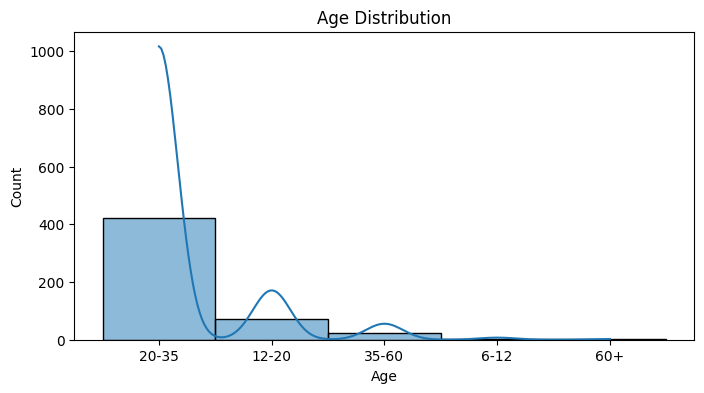

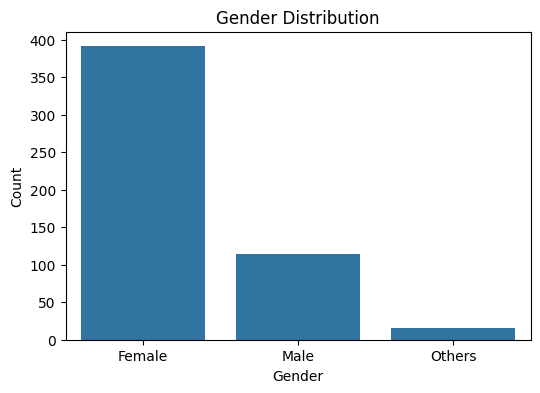

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**The Correlation Heatmap**

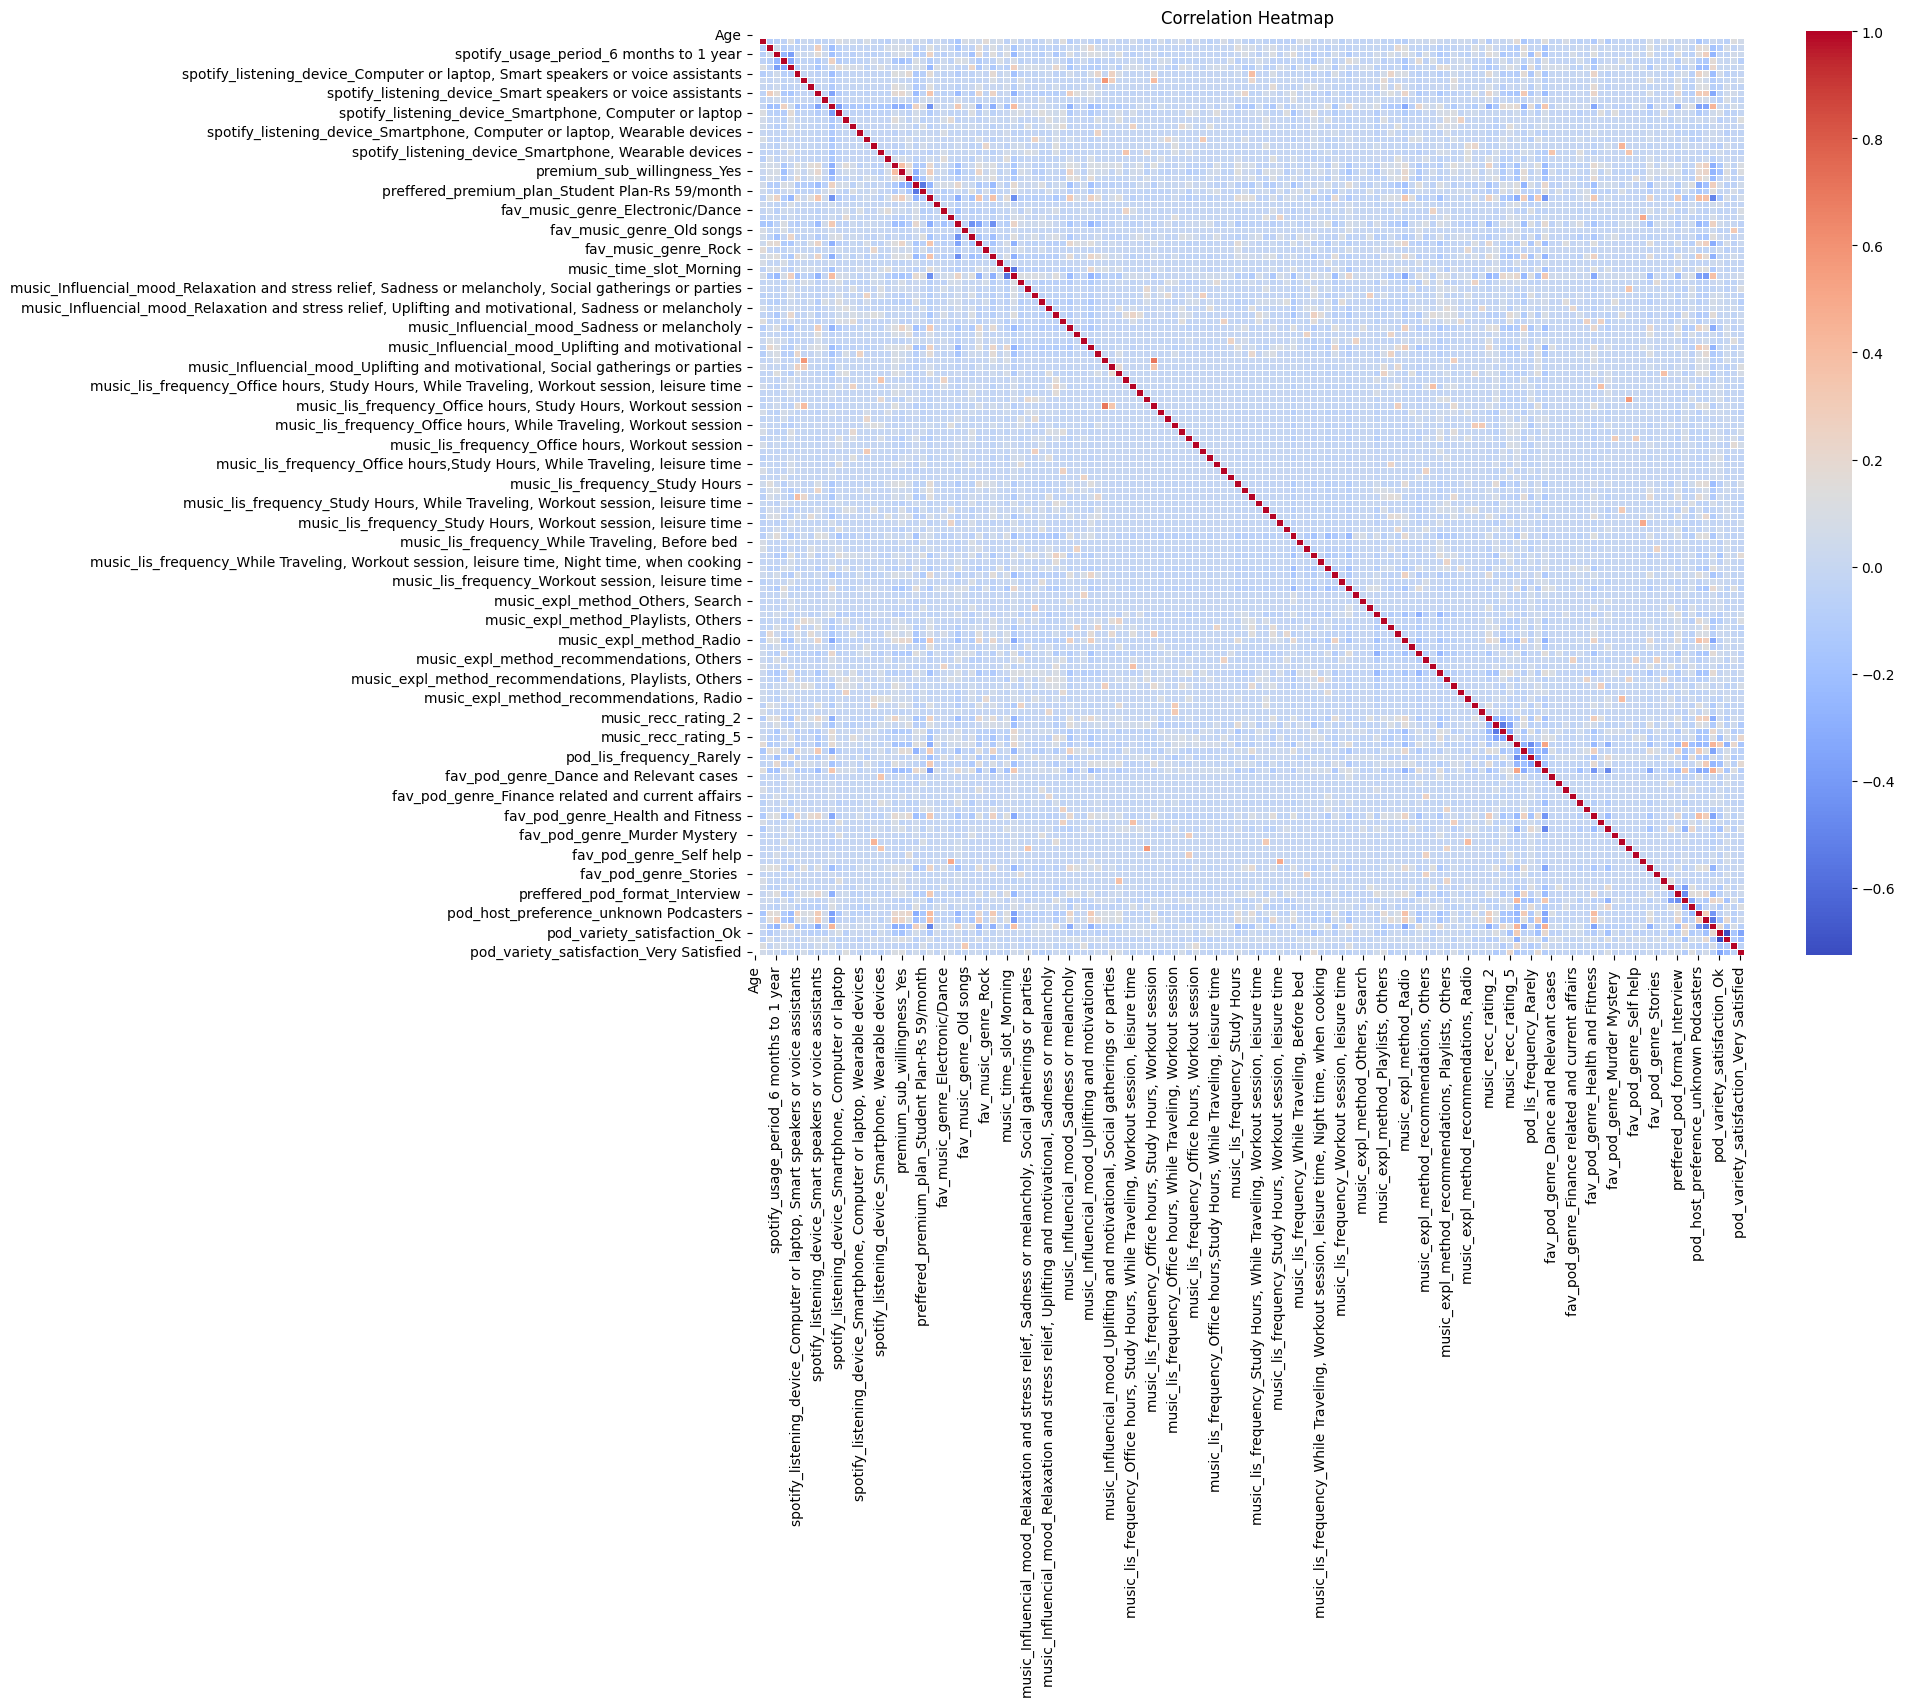

In [13]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].mean())
categorical_cols = [col for col in df.columns if col != 'Age']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
corr_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



**04: Aggregate User Behavior**

**Favourite Music Genre**

In [14]:

agg_df = df.groupby('fav_music_genre')['music_lis_frequency'].value_counts().unstack().fillna(0)
print(agg_df)



music_lis_frequency        Office hours  \
fav_music_genre                           
All                                 0.0   
Classical & melody, dance           1.0   
Electronic/Dance                    1.0   
Kpop                                0.0   
Melody                              6.0   
Old songs                           0.0   
Pop                                 3.0   
Rap                                 3.0   
Rock                                0.0   
classical                           2.0   
trending songs random               0.0   

music_lis_frequency        Office hours, Study Hours, While Traveling  \
fav_music_genre                                                         
All                                                               0.0   
Classical & melody, dance                                         0.0   
Electronic/Dance                                                  0.0   
Kpop                                                              0.0   
Me

**Music By Gender**

In [15]:
agg_df = df.groupby('Gender')['music_lis_frequency'].count().reset_index()
agg_df.columns = ['user_id', 'total_music_entries']
print(agg_df)


  user_id  total_music_entries
0  Female                  391
1    Male                  114
2  Others                   15


**Spotify Listening Device**

In [16]:
agg_behavior = df['spotify_listening_device'].value_counts().reset_index()
agg_behavior.columns = ['spotify_listening_device', 'total_users']
print(agg_behavior)


                             spotify_listening_device  total_users
0                                          Smartphone          300
1                                  Computer or laptop           54
2                      Smartphone, Computer or laptop           48
3                  Smart speakers or voice assistants           43
4   Computer or laptop, Smart speakers or voice as...           14
5      Smartphone, Smart speakers or voice assistants           10
6                        Smartphone, Wearable devices            8
7   Smartphone, Computer or laptop, Smart speakers...            8
8                                    Wearable devices            8
9   Smartphone, Computer or laptop, Smart speakers...            7
10               Computer or laptop, Wearable devices            5
11   Smartphone, Computer or laptop, Wearable devices            5
12  Smartphone, Smart speakers or voice assistants...            5
13  Computer or laptop, Smart speakers or voice as...         

**05: Label Encoding Categorical Features**

**Label Encoding Setup & Application**

In [17]:
le_gender = LabelEncoder()
le_genre = LabelEncoder()
le_sub_plan = LabelEncoder()
le_pod_genre = LabelEncoder()

df['Gender_enc'] = le_gender.fit_transform(df['Gender'])
df['fav_music_genre_enc'] = le_genre.fit_transform(df['fav_music_genre'])
df['spotify_subscription_plan_enc'] = le_sub_plan.fit_transform(df['spotify_subscription_plan'])
df['fav_pod_genre_enc'] = le_pod_genre.fit_transform(df['fav_pod_genre'])


**Dispaly Encoded Results**

In [18]:
print(df[['Gender', 'Gender_enc',
          'fav_music_genre', 'fav_music_genre_enc',
          'spotify_subscription_plan', 'spotify_subscription_plan_enc',
          'fav_pod_genre', 'fav_pod_genre_enc']].head())


   Gender  Gender_enc fav_music_genre  fav_music_genre_enc  \
0  Female           0          Melody                    4   
1    Male           1             Rap                    7   
2  Others           2             Pop                    6   
3  Female           0          Melody                    4   
4  Female           0          Melody                    4   

  spotify_subscription_plan  spotify_subscription_plan_enc  \
0       Free (ad-supported)                              0   
1       Free (ad-supported)                              0   
2       Free (ad-supported)                              0   
3       Free (ad-supported)                              0   
4       Free (ad-supported)                              0   

          fav_pod_genre  fav_pod_genre_enc  
0                Comedy                  1  
1                Comedy                  1  
2                Sports                 16  
3                Comedy                  1  
4  Lifestyle and Health      

**06: Final Dataset Creation**

In [19]:
features = [
    'Age',
    'Gender_enc',
    'fav_music_genre_enc',
    'spotify_subscription_plan_enc',
    'fav_pod_genre_enc'
]
X = df[features]

y = df['spotify_usage_period']  # example target, just to show usage

print("Features:\n", X.head())
print("Target:\n", y.head())


Features:
    Age  Gender_enc  fav_music_genre_enc  spotify_subscription_plan_enc  \
0  NaN           0                    4                              0   
1  NaN           1                    7                              0   
2  NaN           2                    6                              0   
3  NaN           0                    4                              0   
4  NaN           0                    4                              0   

   fav_pod_genre_enc  
0                  1  
1                  1  
2                 16  
3                  1  
4                 10  
Target:
 0     More than 2 years
1     More than 2 years
2    6 months to 1 year
3     1 year to 2 years
4     1 year to 2 years
Name: spotify_usage_period, dtype: object


**07: Train Test Split**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\nSample X_train:\n", X_train.head())
print("\nSample y_train:\n", y_train.head())


X_train shape: (416, 5)
y_train shape: (416,)
X_test shape: (104, 5)
y_test shape: (104,)

Sample X_train:
      Age  Gender_enc  fav_music_genre_enc  spotify_subscription_plan_enc  \
339  NaN           0                    4                              0   
488  NaN           0                    4                              0   
126  NaN           0                    4                              0   
419  NaN           0                    4                              0   
458  NaN           0                    4                              0   

     fav_pod_genre_enc  
339                  1  
488                 16  
126                 10  
419                 10  
458                 10  

Sample y_train:
 339     More than 2 years
488     1 year to 2 years
126    Less than 6 months
419    6 months to 1 year
458     More than 2 years
Name: spotify_usage_period, dtype: object


**08: Train XGBoost Model**

In [22]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [23]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

**09: Model Evaluation**

In [24]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)  # note: no slicing to [:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))


roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC (ovr):", roc_auc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3076923076923077
ROC AUC (ovr): 0.5631514883148792

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.21      0.19        28
           1       0.38      0.25      0.30        24
           2       0.11      0.06      0.07        18
           3       0.44      0.56      0.49        34

    accuracy                           0.31       104
   macro avg       0.27      0.27      0.26       104
weighted avg       0.30      0.31      0.29       104



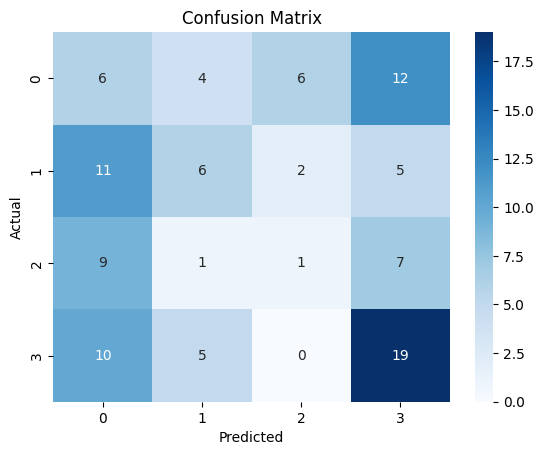

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**10: Feature Importance**

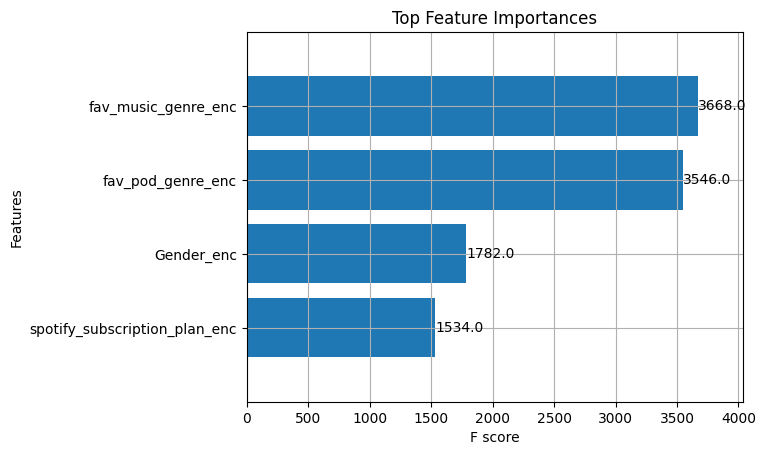

In [26]:
xgb.plot_importance(model, height=0.8, max_num_features=10)
plt.title("Top Feature Importances")
plt.show()

**11: Save Model**

In [27]:
joblib.dump(model, "spotify_replay_model.pkl")

['spotify_replay_model.pkl']

**12. Inference On New Data**

In [28]:
new_data = pd.DataFrame({
    'Age': [25],
    'Gender_enc': [1],
    'fav_music_genre_enc': [2],
    'spotify_subscription_plan_enc': [0],
    'fav_pod_genre_enc': [1]
})

In [29]:
prediction = model.predict(new_data)
print("Replay Prediction:", prediction[0])


Replay Prediction: 0


**Explainability With SHAP**

In [30]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

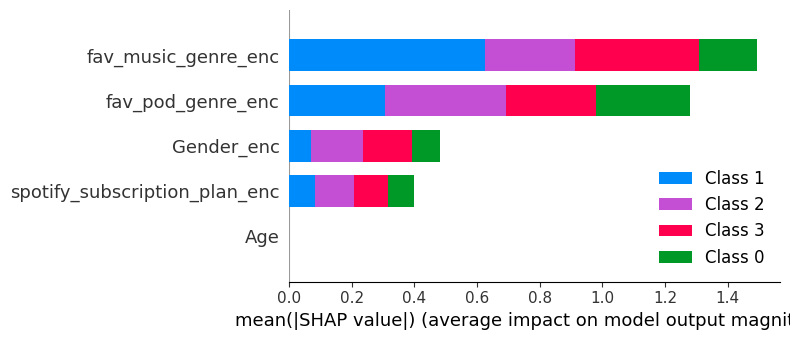

In [31]:
shap.summary_plot(shap_values, X_test)